In [1]:
import pandas as pd

# Load the Excel file
file_path = "/content/drive/MyDrive/work related fatal injuries.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()


,Enforcing authority,Year\n[Note 1],Employment Status - overview \n[Note 2],Employment Status - detail,Age band,Gender of deceased person,Kind of accident,Top-level Industry (SIC section)\n[Note 3],Detailed industry (2-Digit SIC)\n[Note 3] [Note 4],Country,Region,LA Name (of incident location)
0,HSE,2018/19,Workers,Employee,65 and over,Male,Drowning or asphyxiation,"A - Agriculture, Forestry And Fishing","01 Crop-animal production, hunting & related s...",Scotland,Scotland,Aberdeenshire
1,HSE,2018/19,Workers,Employee,45 - 54,Male,Contact with moving machinery,"A - Agriculture, Forestry And Fishing","01 Crop-animal production, hunting & related s...",Scotland,Scotland,Aberdeenshire
2,HSE,2018/19,Workers,Self-employed,45 - 54,Male,Falls from a height,"A - Agriculture, Forestry And Fishing","01 Crop-animal production, hunting & related s...",Scotland,Scotland,Angus
3,HSE,2021/22r,Workers,Employee,45 - 54,Male,"Exposure to, or contact with, a harmful substance",B - Mining and Quarrying,09 Mining support service activities,Not known,Not known,Not known
4,HSE,2019/20,Workers,Self-employed,65 and over,Male,Injured by an animal,"A - Agriculture, Forestry And Fishing","01 Crop-animal production, hunting & related s...",England,North West,Carlisle


In [2]:
# Basic Information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Enforcing authority                                1100 non-null   object
 1   Year
[Note 1]                                      1100 non-null   object
 2   Employment Status - overview 
[Note 2]             1100 non-null   object
 3   Employment Status - detail                         1100 non-null   object
 4   Age band                                           1100 non-null   object
 5   Gender of deceased person                          1100 non-null   object
 6   Kind of accident                                   1100 non-null   object
 7   Top-level Industry (SIC section)
[Note 3]          1100 non-null   object
 8   Detailed industry (2-Digit SIC)
[Note 3] [Note 4]  1100 non-null   object
 9   Country            

In [3]:
# Descriptive statistics for categorical columns

# List of columns to generate statistics
columns_to_describe = [
    "Employment Status - detail",
    "Gender of deceased person",
    "Kind of accident",
    "Top-level Industry (SIC section)\n[Note 3]",
    "Country"
]

# Generate and display statistics
statistics = {}
for column in columns_to_describe:
    statistics[column] = data[column].value_counts()

statistics


{'Employment Status - detail': Employee                446
 Member of the public    435
 Self-employed           219
 Name: Employment Status - detail, dtype: int64,
 'Gender of deceased person': Male         915
 Female       174
 Not known     11
 Name: Gender of deceased person, dtype: int64,
 'Kind of accident': Struck by moving vehicle                                 248
 Falls from a height                                      242
 Struck by moving, including flying or falling, object    118
 Slips, trips or falls on same level                       83
 Other kind of accident                                    71
 Trapped by something collapsing or overturning            70
 Contact with moving machinery                             66
 Drowning or asphyxiation                                  57
 Contact with electricity or electrical discharge          46
 Injured by an animal                                      38
 Strike against something fixed or stationary              19
 

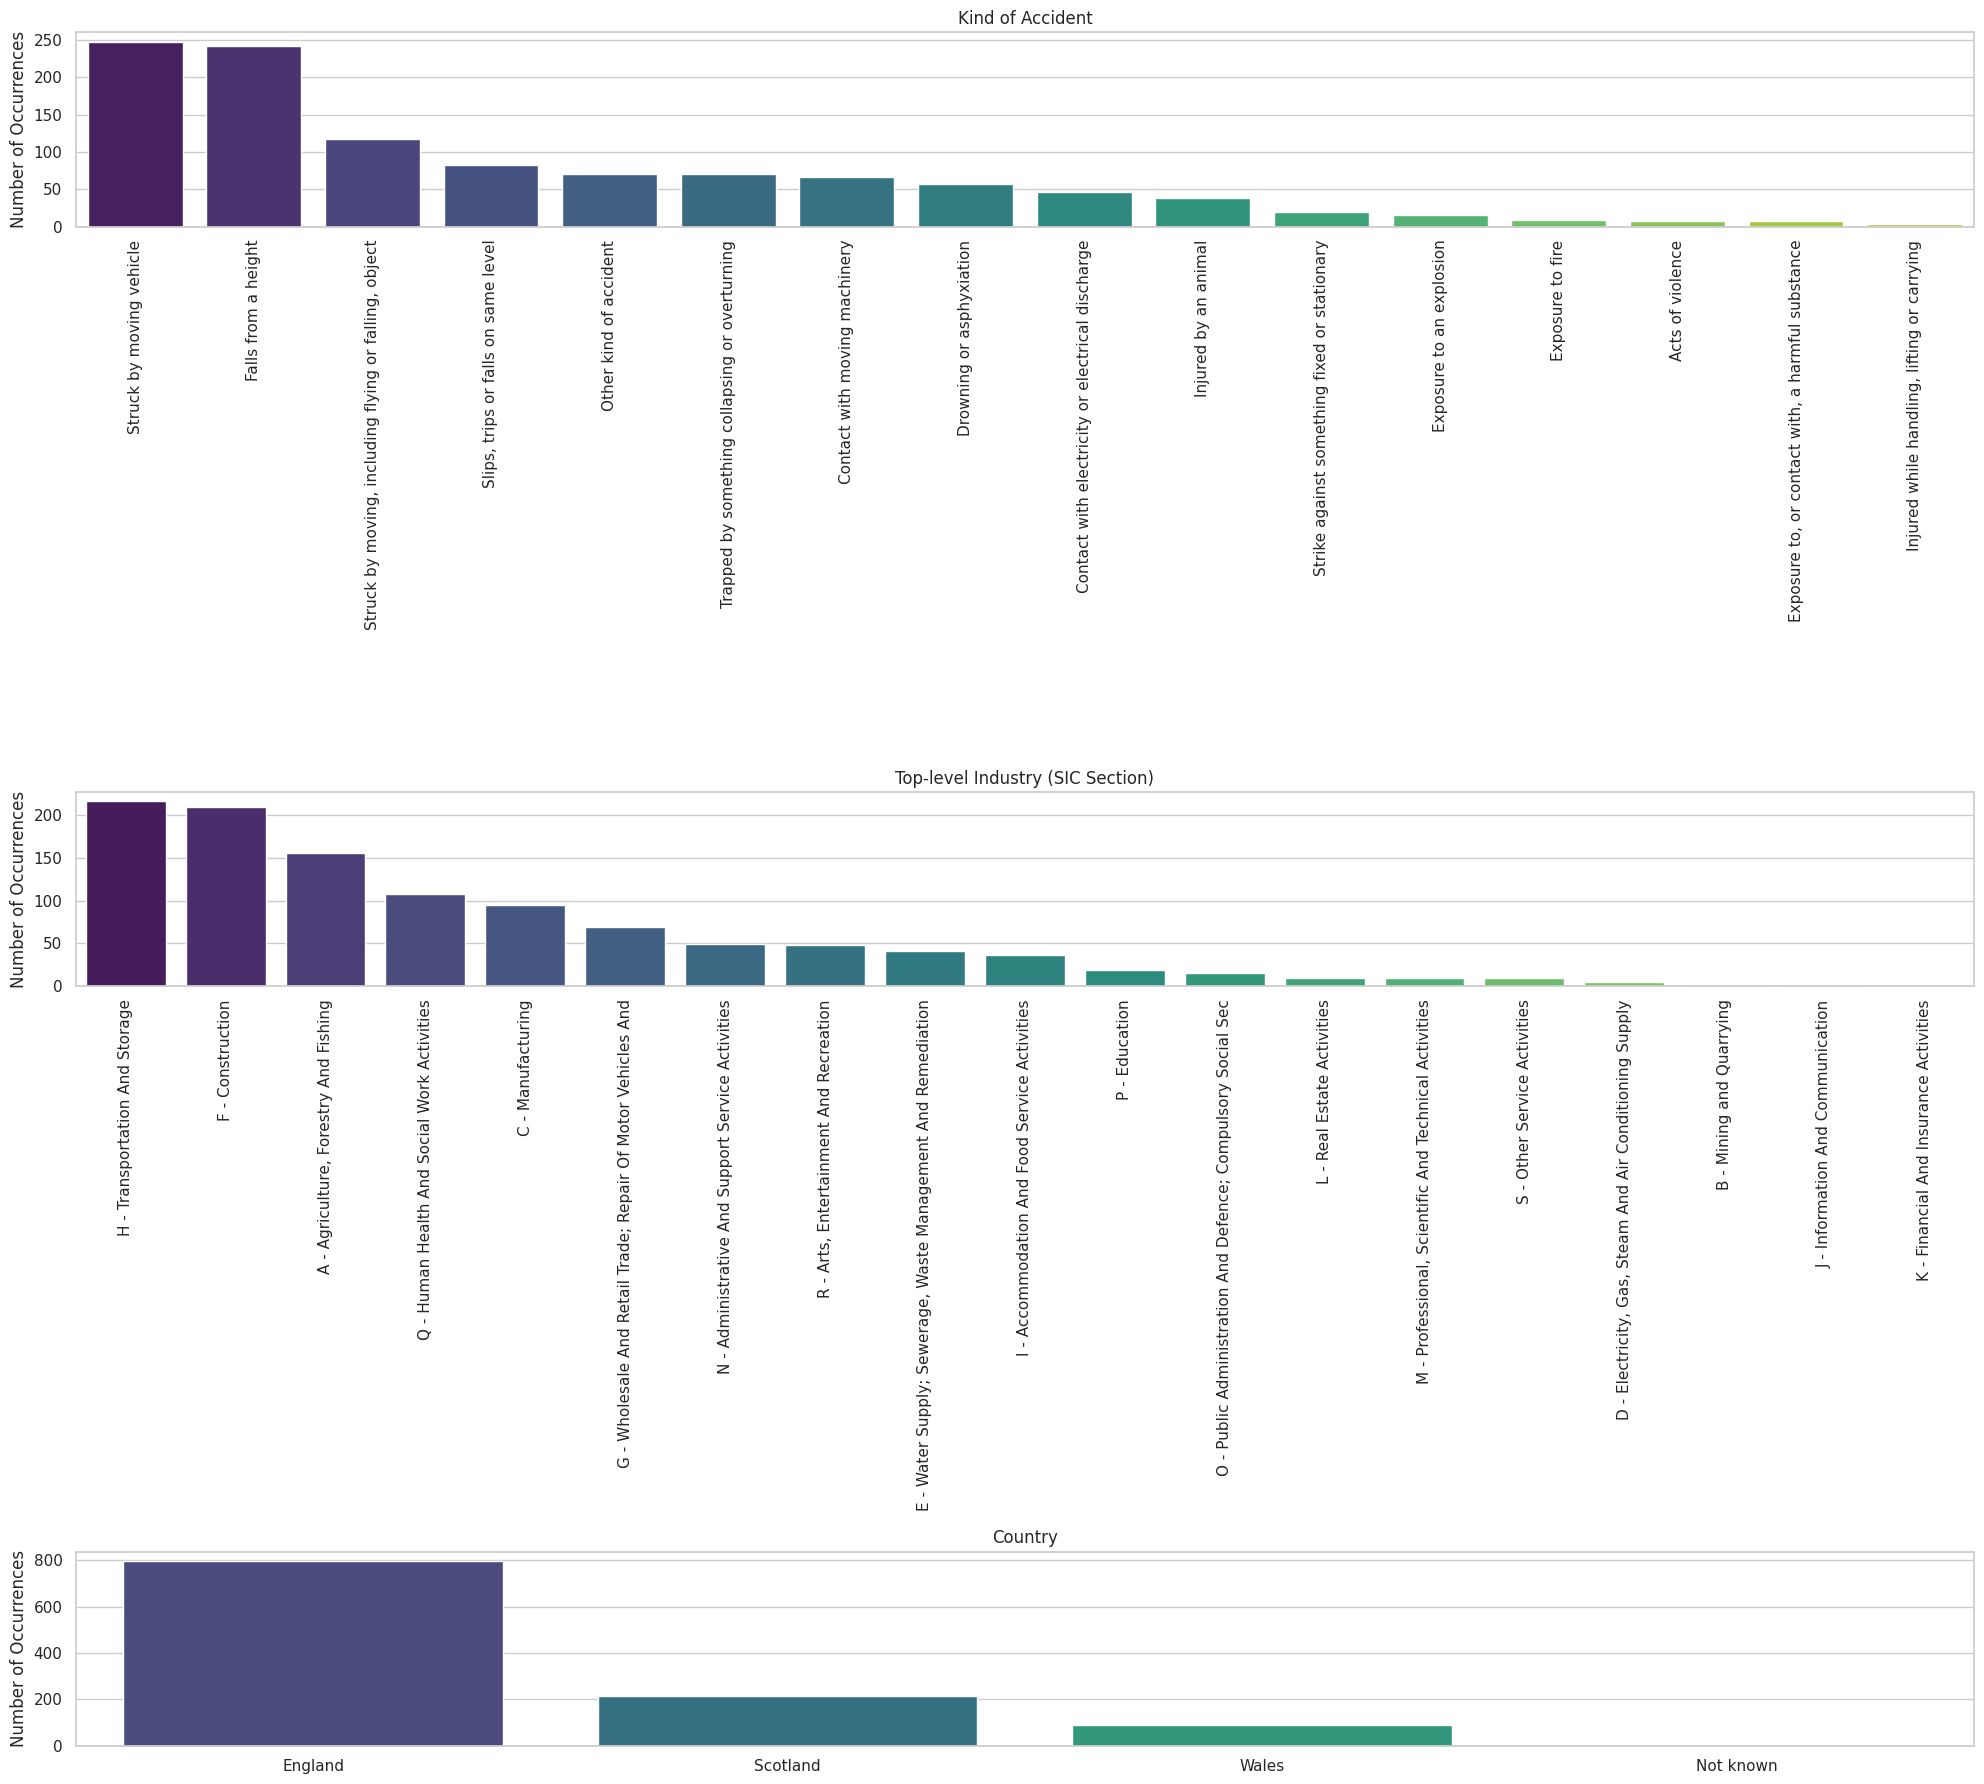

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Define the plots' dimensions
plt.figure(figsize=(20, 18))

# Plot for "Kind of accident"
plt.subplot(3, 1, 1)
accident_kind_counts = data["Kind of accident"].value_counts()
sns.barplot(x=accident_kind_counts.index, y=accident_kind_counts.values, palette="viridis")
plt.title("Kind of Accident")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)

# Plot for "Top-level Industry (SIC section)"
plt.subplot(3, 1, 2)
industry_counts = data["Top-level Industry (SIC section)\n[Note 3]"].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.title("Top-level Industry (SIC Section)")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)

# Plot for "Country"
plt.subplot(3, 1, 3)
country_counts = data["Country"].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title("Country")
plt.ylabel("Number of Occurrences")

# Display the plots
plt.tight_layout()
plt.show()


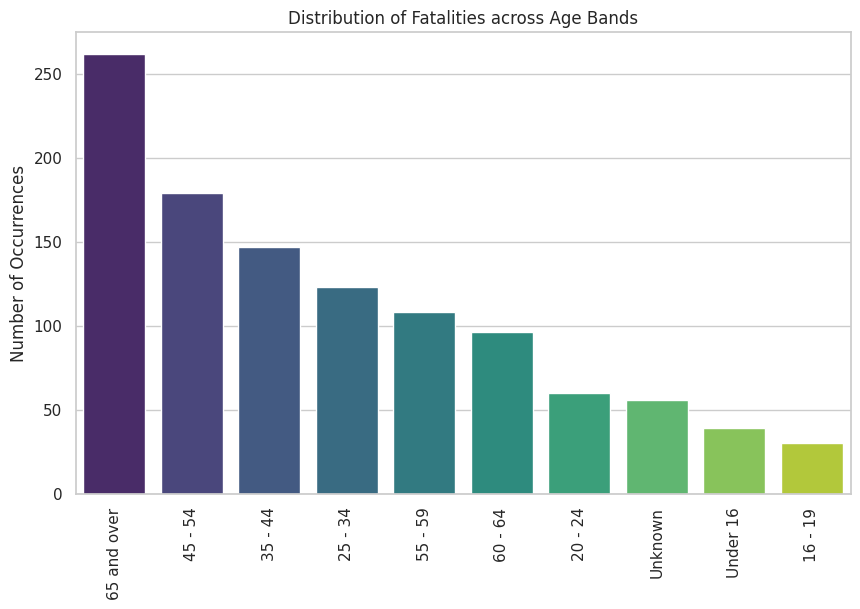

In [ ]:
# Plotting the distribution of fatalities across different age bands
plt.figure(figsize=(10, 6))
age_band_counts = data["Age band"].value_counts()
sns.barplot(x=age_band_counts.index, y=age_band_counts.values, palette="viridis")
plt.title("Distribution of Fatalities across Age Bands")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

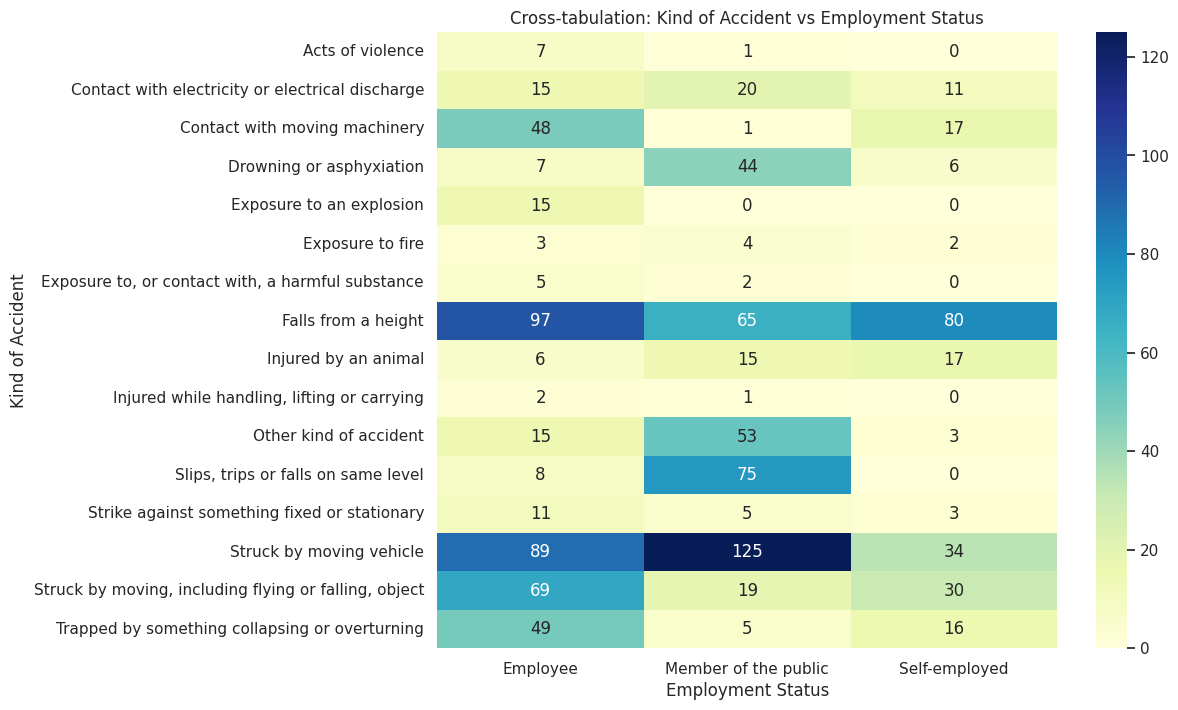

In [ ]:
# Cross-tabulation between Kind of accident and Employment Status - detail
cross_tab = pd.crosstab(data['Kind of accident'], data['Employment Status - detail'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title("Cross-tabulation: Kind of Accident vs Employment Status")
plt.ylabel("Kind of Accident")
plt.xlabel("Employment Status")
plt.show()


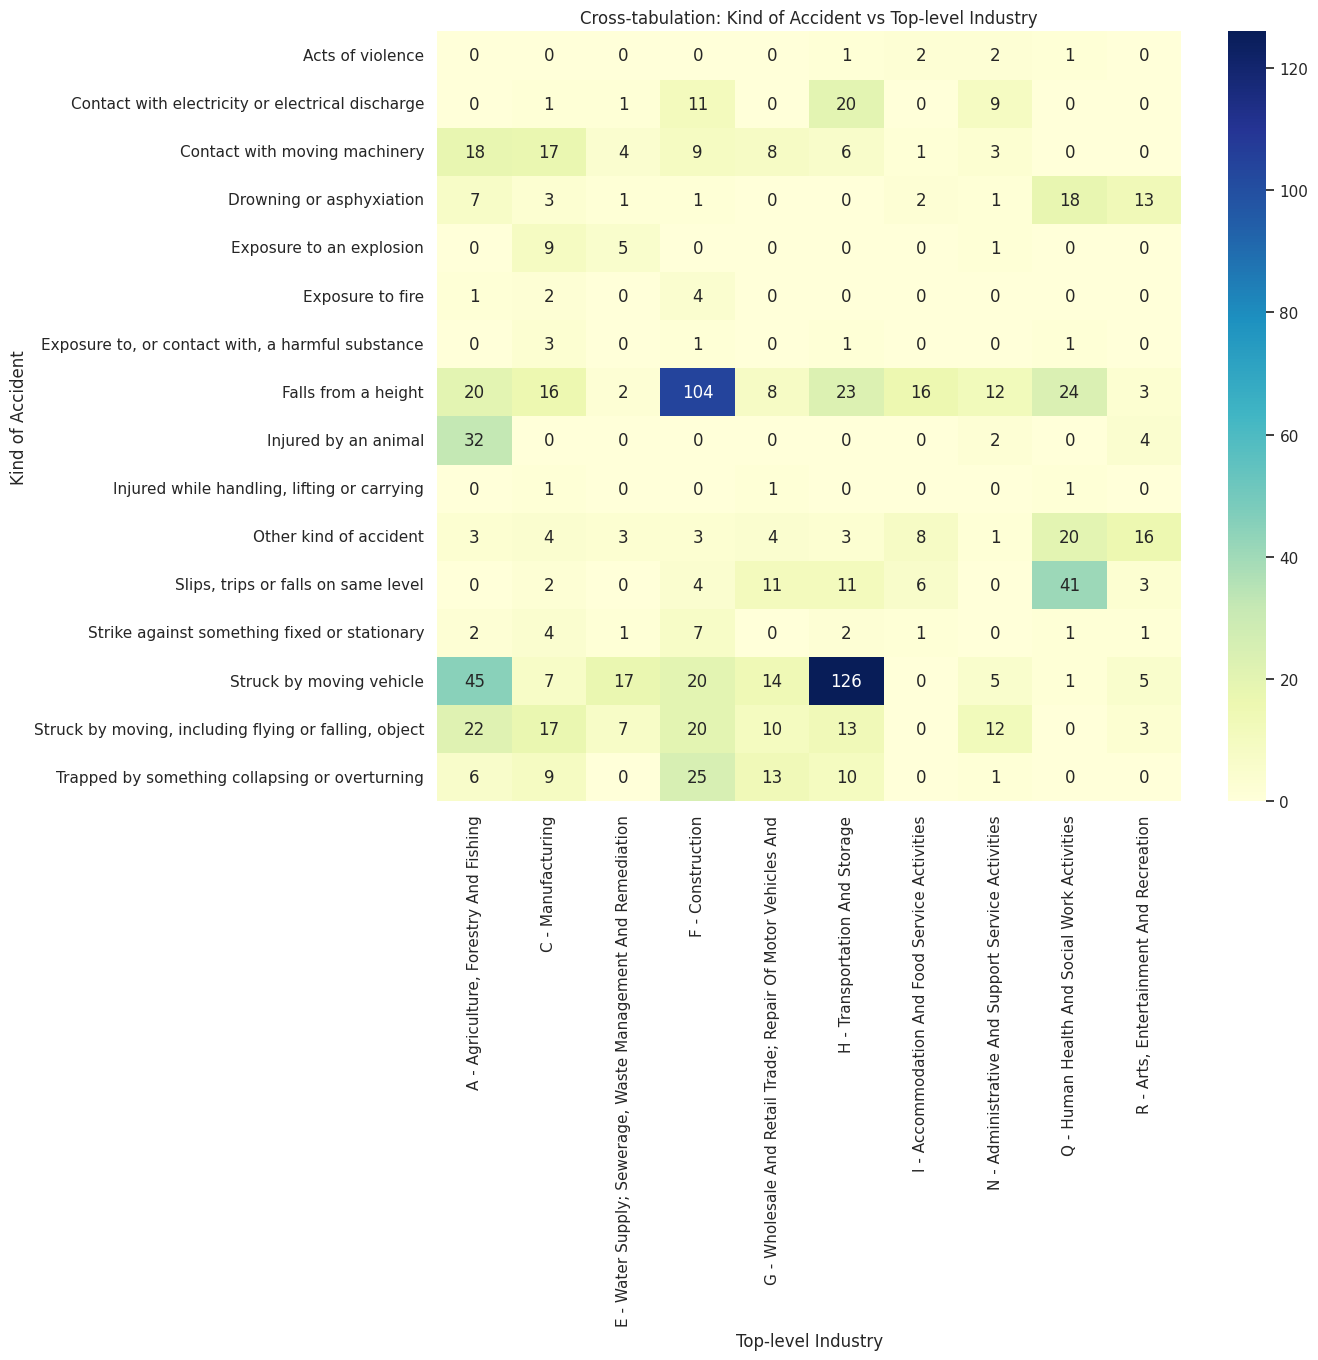

In [ ]:
# Selecting top 10 sectors with most accidents
top_sectors = data['Top-level Industry (SIC section)\n[Note 3]'].value_counts().index[:10]

# Creating a subset of data with only top sectors
data_subset = data[data['Top-level Industry (SIC section)\n[Note 3]'].isin(top_sectors)]

# Cross-tabulation between Kind of accident and Top-level Industry (SIC section)
cross_tab = pd.crosstab(data_subset['Kind of accident'], data_subset['Top-level Industry (SIC section)\n[Note 3]'])

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title("Cross-tabulation: Kind of Accident vs Top-level Industry")
plt.ylabel("Kind of Accident")
plt.xlabel("Top-level Industry")
plt.show()


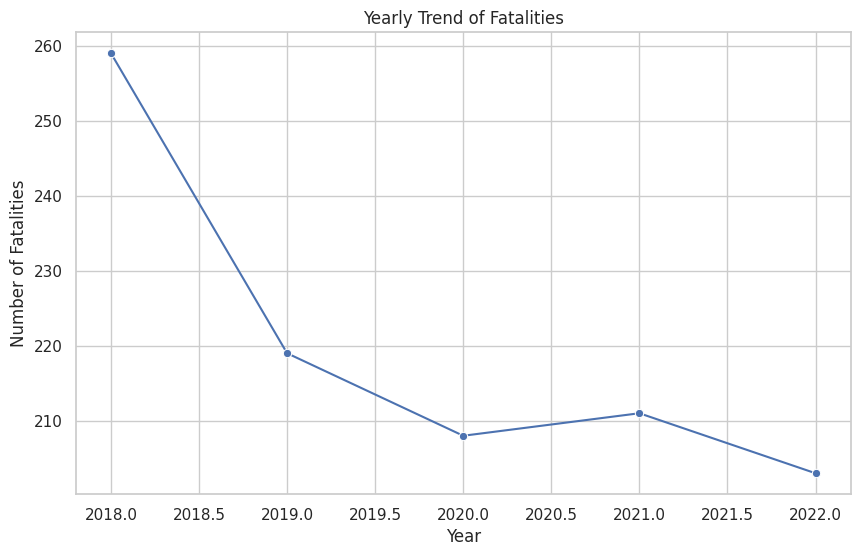

In [ ]:
# Cleaning the "Year" column to extract the starting year
data["Year"] = data["Year\n[Note 1]"].str.split("/").str[0].astype(int)

# Counting the number of fatalities for each year
yearly_counts = data["Year"].value_counts().sort_index()

# Plotting the yearly trend of fatalities
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o")
plt.title("Yearly Trend of Fatalities")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Grouping by industry sector and finding the most common accident type in each sector
most_common_accidents = data.groupby('Top-level Industry (SIC section)\n[Note 3]')['Kind of accident'].agg(lambda x: x.value_counts().index[0])

most_common_accidents


Top-level Industry (SIC section)\n[Note 3]
A - Agriculture, Forestry And Fishing                                                    Struck by moving vehicle
B - Mining and Quarrying                                        Exposure to, or contact with, a harmful substance
C - Manufacturing                                                                   Contact with moving machinery
D - Electricity, Gas, Steam And Air Conditioning Supply          Contact with electricity or electrical discharge
E - Water Supply; Sewerage, Waste Management And Remediation                             Struck by moving vehicle
F - Construction                                                                              Falls from a height
G - Wholesale And Retail Trade; Repair Of Motor Vehicles And                             Struck by moving vehicle
H - Transportation And Storage                                                           Struck by moving vehicle
I - Accommodation And Food Service Activities

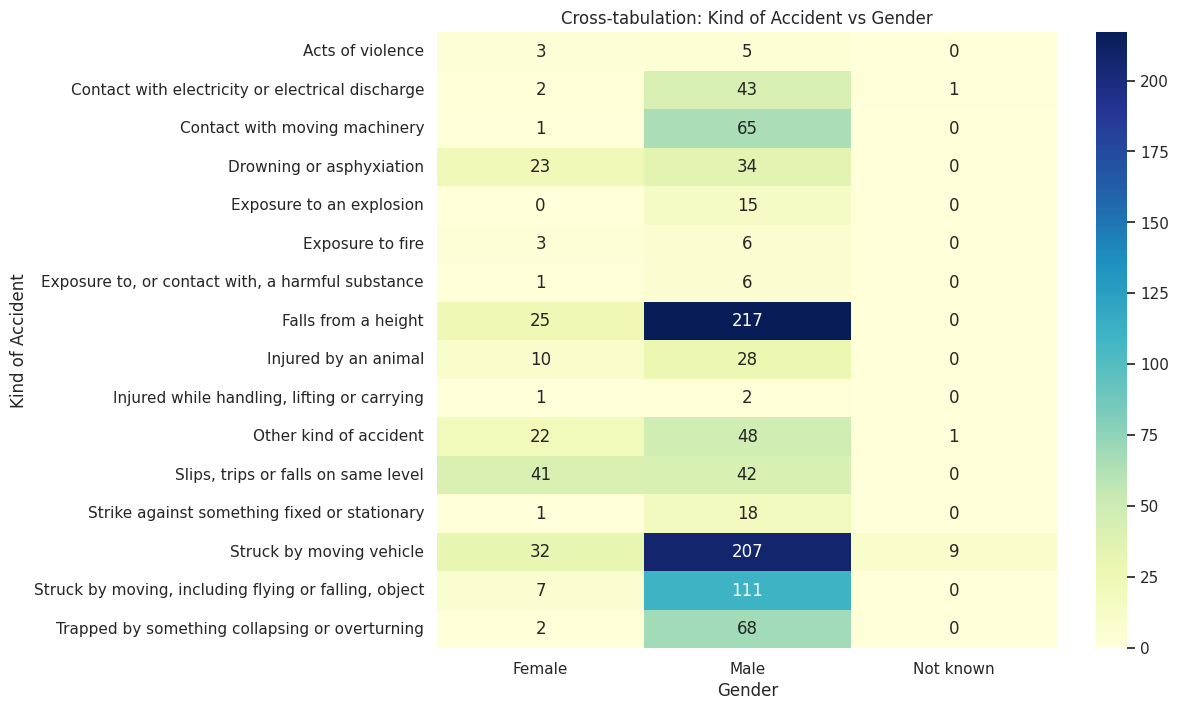

In [ ]:
# Cross-tabulation between Kind of accident and Gender of deceased person
cross_tab = pd.crosstab(data['Kind of accident'], data['Gender of deceased person'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title("Cross-tabulation: Kind of Accident vs Gender")
plt.ylabel("Kind of Accident")
plt.xlabel("Gender")
plt.show()


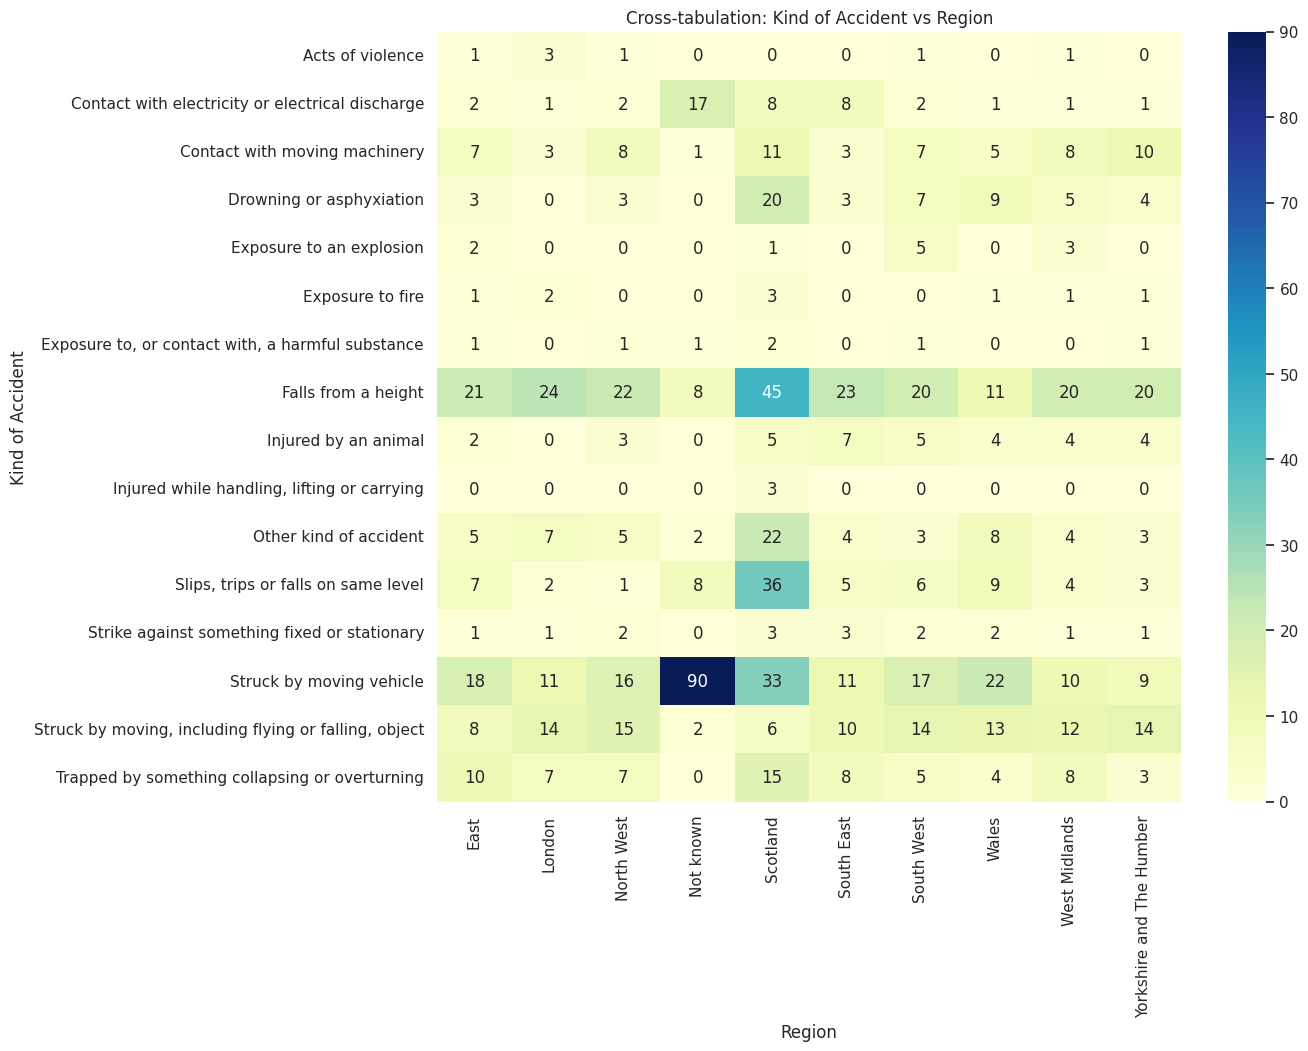

In [ ]:
# Selecting top 10 regions with most accidents
top_regions = data['Region'].value_counts().index[:10]

# Creating a subset of data with only top regions
data_subset = data[data['Region'].isin(top_regions)]

# Cross-tabulation between Kind of accident and Region
cross_tab = pd.crosstab(data_subset['Kind of accident'], data_subset['Region'])

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title("Cross-tabulation: Kind of Accident vs Region")
plt.ylabel("Kind of Accident")
plt.xlabel("Region")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-

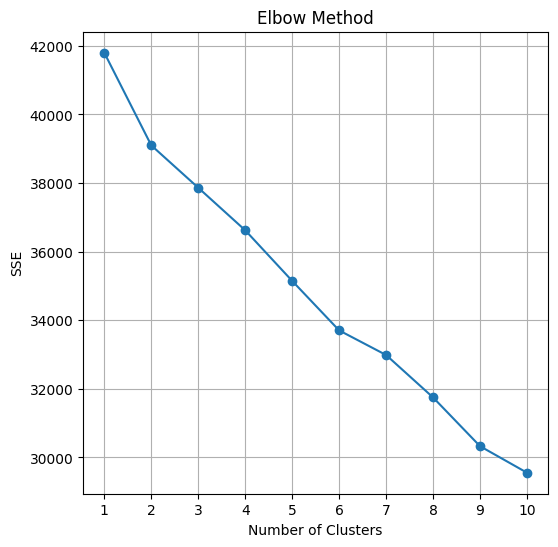

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:

# Select the relevant columns for clustering
data_subset = data[['Kind of accident', 'Top-level Industry (SIC section)\n[Note 3]', 'Employment Status - detail']]

# Apply one-hot encoding to convert categorical features to numerical
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data_subset)

# Scale the data to bring all features to a similar scale
scaler = StandardScaler()
data_encoded_scaled = scaler.fit_transform(data_encoded)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_encoded_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each number of clusters to find the elbow point
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), sse, '-o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# From the plot, manually determine the number of clusters (elbow point)
n_clusters = 4

# Run KMeans with the selected number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(data_encoded_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add the cluster assignments to the original DataFrame
data['Cluster'] = cluster_assignments

# Save the DataFrame with cluster assignments to a CSV file
data.to_csv("work_related_fatal_injuries_with_clusters.csv", index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


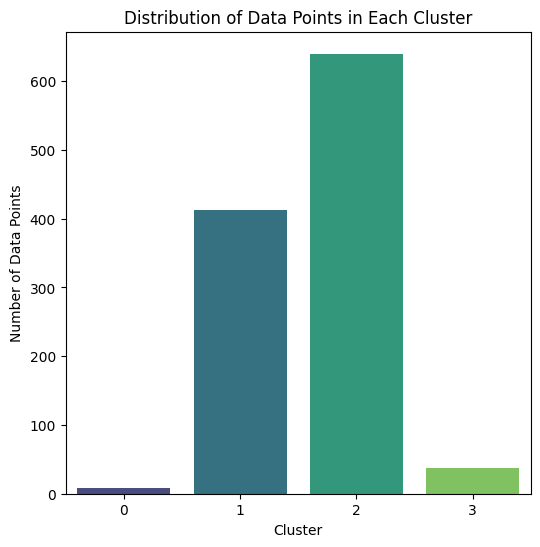

In [9]:
# Run KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(data_encoded_scaled)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Count the number of data points in each cluster
cluster_counts = pd.Series(cluster_assignments).value_counts().sort_index()

# Plot the distribution of data points in each cluster
plt.figure(figsize=(6, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Distribution of Data Points in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.show()


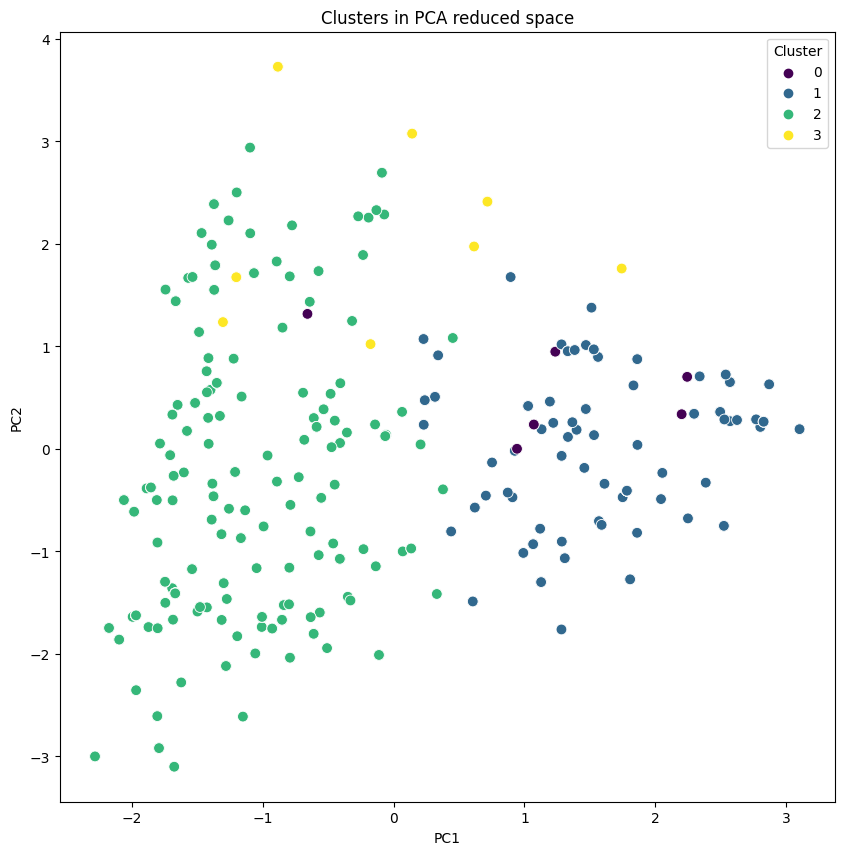

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Run PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_encoded_scaled)

# Create a DataFrame with the principal components and cluster assignments
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Cluster'] = cluster_assignments

# Plot the first two principal components and color the points by cluster assignment
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette="viridis", data=pc_df, s=60)
plt.title('Clusters in PCA reduced space')
plt.show()
